<a href="https://colab.research.google.com/github/mateosuster/pythonungs/blob/master/codigos/manipulacion_de_datos/4_Manipulaci%C3%B3n_de_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración y manipulación de datos de bonos 

Veamos algunas cotizaciones reales de [bonos argentinos](https://datos.gob.ar/dataset/sspm-titulos-publicos-deuda/archivo/sspm_179.1)

## Buscamos y cargamos los datos

In [ ]:
!wget https://infra.datos.gob.ar/catalog/sspm/dataset/179/distribution/179.1/download/titulos-publicos.csv

--2022-06-21 18:50:04--  https://infra.datos.gob.ar/catalog/sspm/dataset/179/distribution/179.1/download/titulos-publicos.csv
Resolving infra.datos.gob.ar (infra.datos.gob.ar)... 186.33.215.176
Connecting to infra.datos.gob.ar (infra.datos.gob.ar)|186.33.215.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1587473 (1.5M) [text/csv]
Saving to: ‘titulos-publicos.csv.1’

titulos-publicos.cs 100%[===================>]   1.51M  1.67MB/s    in 0.9s    

2022-06-21 18:50:05 (1.67 MB/s) - ‘titulos-publicos.csv.1’ saved [1587473/1587473]



In [ ]:
import pandas as pd 

df = pd.read_csv("/content/titulos-publicos.csv")
df.head(7)

,indice_tiempo,aa19_cotizacion,aa19_yield,aa19_dur,aa19_ppv_en_anios,aa21_cotizacion,aa21_yield,aa21_dur,aa21_ppv_en_anios,a2e2_cotizacion,...,a2m2_dur,a2m2_ppv_en_anios,td21_cotizacion,td21_yield,td21_dur,td21_ppv_en_anios,tvpp_cotizacion,tvpy_cotizacion,tvpa_cotizacion,tvpe_cotizacion
0,2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.145,50.85,50.7,57.00
1,2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.340,50.30,50.4,55.60
2,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.200,49.00,50.0,54.50
3,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.080,47.25,48.1,52.25
6,2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.750,44.00,45.4,50.30


In [ ]:
df.tail(3)

,indice_tiempo,aa19_cotizacion,aa19_yield,aa19_dur,aa19_ppv_en_anios,aa21_cotizacion,aa21_yield,aa21_dur,aa21_ppv_en_anios,a2e2_cotizacion,...,a2m2_dur,a2m2_ppv_en_anios,td21_cotizacion,td21_yield,td21_dur,td21_ppv_en_anios,tvpp_cotizacion,tvpy_cotizacion,tvpa_cotizacion,tvpe_cotizacion
2796,2020-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2797,2020-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2798,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,97.0,0.4593,0.69,0.86,1.85,86.0,75.5,NaN


In [ ]:
df.columns

Index(['indice_tiempo', 'aa19_cotizacion', 'aa19_yield', 'aa19_dur',
       'aa19_ppv_en_anios', 'aa21_cotizacion', 'aa21_yield', 'aa21_dur',
       'aa21_ppv_en_anios', 'a2e2_cotizacion',
       ...
       'a2m2_dur', 'a2m2_ppv_en_anios', 'td21_cotizacion', 'td21_yield',
       'td21_dur', 'td21_ppv_en_anios', 'tvpp_cotizacion', 'tvpy_cotizacion',
       'tvpa_cotizacion', 'tvpe_cotizacion'],
      dtype='object', length=225)

Seleccionamos algunas variables de interés, dado que con 225 se torna dificultoso...

In [ ]:
df_sel =df[["indice_tiempo", "dicy_cotizacion", "pary_cotizacion", "ac17_cotizacion"]]

### Exploración inicial

In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indice_tiempo    2799 non-null   object 
 1   dicy_cotizacion  1801 non-null   float64
 2   pary_cotizacion  1771 non-null   float64
 3   ac17_cotizacion  769 non-null    float64
dtypes: float64(3), object(1)
memory usage: 87.6+ KB


In [ ]:
df_sel.dtypes

indice_tiempo       object
dicy_cotizacion    float64
pary_cotizacion    float64
ac17_cotizacion    float64
dtype: object

In [ ]:
df_sel.describe()

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
count,1801.000000,1771.000000,769.000000
mean,2970.292655,1433.169060,2844.229843
std,1908.004774,1141.915304,891.137608
min,603.000000,243.000000,1526.000000
25%,1530.000000,640.500000,1930.000000
50%,2435.000000,1038.000000,2870.000000
75%,4471.500000,2100.000000,3310.000000
max,9780.000000,5850.000000,5850.000000


## Ordenando valores por índice o columna

Con `sort_index()` podemos ordenar los valores por índice. Podemos usar [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) si deseamos ordenar por algun valor particular.

In [ ]:
df_sel = df_sel.sort_index()
df_sel

,indice_tiempo,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
0,2013-01-02,700.0,252.0,NaN
1,2013-01-03,700.0,252.0,NaN
2,2013-01-04,700.0,252.0,NaN
3,2013-01-05,NaN,NaN,NaN
4,2013-01-06,NaN,NaN,NaN
...,...,...,...,...
2794,2020-08-27,7850.0,4700.0,4700.0
2795,2020-08-28,7701.0,4650.0,4650.0
2796,2020-08-29,NaN,NaN,NaN
2797,2020-08-30,NaN,NaN,NaN


In [ ]:
df_sel.sort_values(by = ["dicy_cotizacion"], axis = 0, ascending=False)

,indice_tiempo,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
2774,2020-08-07,9780.0,5685.0,5800.0
2779,2020-08-12,9639.5,5850.0,5765.0
2787,2020-08-20,9600.0,5800.0,5745.0
2780,2020-08-13,9560.0,5800.0,5715.0
2778,2020-08-11,9555.0,5799.0,5770.0
...,...,...,...,...
2784,2020-08-17,NaN,NaN,NaN
2789,2020-08-22,NaN,NaN,NaN
2790,2020-08-23,NaN,NaN,NaN
2796,2020-08-29,NaN,NaN,NaN


## Creación de variables y nuevos valores

In [ ]:
df_sel['brechaDicyPary'] = (df_sel['dicy_cotizacion']/df_sel['pary_cotizacion'] - 1)*100 
df_sel

,indice_tiempo,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
0,2013-01-02,700.0,252.0,NaN,177.777778
1,2013-01-03,700.0,252.0,NaN,177.777778
2,2013-01-04,700.0,252.0,NaN,177.777778
3,2013-01-05,NaN,NaN,NaN,NaN
4,2013-01-06,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2794,2020-08-27,7850.0,4700.0,4700.0,67.021277
2795,2020-08-28,7701.0,4650.0,4650.0,65.612903
2796,2020-08-29,NaN,NaN,NaN,NaN
2797,2020-08-30,NaN,NaN,NaN,NaN


### Creación de variables tipo fecha

Detectamos que la variable de tiempo es tipo string ("object"). Podemos convertirla a una variable temporal con la función [`date_time()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) de Pandas. Para ello creamos una nueva columna, lo cual se hace de la siguiente forma:

In [ ]:
df_sel["indice_tiempo"] =  pd.to_datetime(df_sel["indice_tiempo"]) 
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   indice_tiempo    2799 non-null   datetime64[ns]
 1   dicy_cotizacion  1801 non-null   float64       
 2   pary_cotizacion  1771 non-null   float64       
 3   ac17_cotizacion  769 non-null    float64       
 4   brechaDicyPary   1726 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 109.5 KB


### Conversión columna a índice

Podemos setear a la variable temporal como índice de todo el dataset con `set_index()`. La inversa es `reset_index()`.

In [ ]:
df_sel = df_sel.set_index(keys = "indice_tiempo")
df_sel.head(4)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2013-01-02,700.0,252.0,NaN,177.777778
2013-01-03,700.0,252.0,NaN,177.777778
2013-01-04,700.0,252.0,NaN,177.777778
2013-01-05,NaN,NaN,NaN,NaN


Podemos utilizar el indexado de `.loc` visto previamente

In [ ]:
df_sel.loc["2019-12-31":"2020-04-01", ["dicy_cotizacion", "pary_cotizacion"]]

,dicy_cotizacion,pary_cotizacion
indice_tiempo,,
2019-12-31,NaN,NaN
2020-01-01,NaN,NaN
2020-01-02,6400.0,3650.0
2020-01-03,6400.0,3600.0
2020-01-04,NaN,NaN
...,...,...
2020-03-28,NaN,NaN
2020-03-29,NaN,NaN
2020-03-30,4440.0,2436.0


In [ ]:
df_filtrado = df_sel.loc["2017-01-01":]
df_filtrado

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,2416.0,1009.0,NaN,139.444995
2017-01-03,2402.0,993.0,NaN,141.893253
2017-01-04,2396.0,997.0,NaN,140.320963
2017-01-05,2390.0,991.0,NaN,141.170535
...,...,...,...,...
2020-08-27,7850.0,4700.0,4700.0,67.021277
2020-08-28,7701.0,4650.0,4650.0,65.612903
2020-08-29,NaN,NaN,NaN,NaN


### Aplicando funciones

#### Sobre series

* Podemos aplicar funciones sobre las series

In [ ]:
promedio = df_filtrado.mean()
promedio

dicy_cotizacion    4429.258144
pary_cotizacion    2234.801716
ac17_cotizacion    2844.229843
brechaDicyPary      110.008695
dtype: float64

In [ ]:
minimo = df_filtrado['dicy_cotizacion'].min()
minimo

2330.0

#### Sobre todo el dataset usando apply() y lambda()


* Podemos aplicar una misma función a cada elemento del Series usando [**apply**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).

In [ ]:
df_filtrado.apply(np.log)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2017-01-01,NaN,NaN,NaN
2017-01-02,7.789869,6.916715,NaN
2017-01-03,7.784057,6.900731,NaN
2017-01-04,7.781556,6.904751,NaN
2017-01-05,7.779049,6.898715,NaN
...,...,...,...
2020-08-27,8.968269,8.455318,8.455318
2020-08-28,8.949105,8.444622,8.444622
2020-08-29,NaN,NaN,NaN


Podemos aplicar nuestras propias funciones, definidas con nuestro puño y teclado.

In [ ]:
def por_cien(x): #un ejemplo sencillo
  return x*100

df_filtrado.apply(por_cien)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,241600.0,100900.0,NaN,13944.499504
2017-01-03,240200.0,99300.0,NaN,14189.325277
2017-01-04,239600.0,99700.0,NaN,14032.096289
2017-01-05,239000.0,99100.0,NaN,14117.053481
...,...,...,...,...
2020-08-27,785000.0,470000.0,470000.0,6702.127660
2020-08-28,770100.0,465000.0,465000.0,6561.290323
2020-08-29,NaN,NaN,NaN,NaN


In [ ]:
def var_porcentual(x):
  return  (x / x.shift(1) - 1)*100

df_filtrado.apply(var_porcentual)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,-0.579470,-1.585728,NaN,1.755716
2017-01-04,-0.249792,0.402820,NaN,-1.108079
2017-01-05,-0.250417,-0.601805,NaN,0.605449
...,...,...,...,...
2020-08-27,0.000000,-2.083333,-9.615385,5.476107
2020-08-28,-1.898089,-1.063830,-1.063830,-2.101382
2020-08-29,NaN,NaN,NaN,NaN


Con `lambda` podemos definir la función en una sóla linea

In [ ]:
df_filtrado.apply(lambda x: (x / x.shift(1) - 1)*100 , axis=0)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2017-01-01,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN
2017-01-03,-0.579470,-1.585728,NaN
2017-01-04,-0.249792,0.402820,NaN
2017-01-05,-0.250417,-0.601805,NaN
...,...,...,...
2020-08-27,0.000000,-2.083333,-9.615385
2020-08-28,-1.898089,-1.063830,-1.063830
2020-08-29,NaN,NaN,NaN


Si cambiamos el argumento axis a 1 podremos realizar operaciones relacionando datos de columnas (entonces aplicará la función a cada fila/observación). En este caso, podemos calcular la diferencia entre precios de bonos. 

In [ ]:
df_filtrado.apply(lambda x: (x['dicy_cotizacion']/x['pary_cotizacion'] - 1)*100 , axis=1)

indice_tiempo
2017-01-01           NaN
2017-01-02    139.444995
2017-01-03    141.893253
2017-01-04    140.320963
2017-01-05    141.170535
                 ...    
2020-08-27     67.021277
2020-08-28     65.612903
2020-08-29           NaN
2020-08-30           NaN
2020-08-31     58.643326
Length: 1339, dtype: float64

Podemos guardar esa diferencia en una columna nueva, como ya vimos

In [ ]:
df_filtrado["dif"] = df_filtrado.apply(lambda x: (x['dicy_cotizacion']/x['pary_cotizacion'] - 1)*100 , axis=1) 
df_filtrado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary,dif
indice_tiempo,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-02,2416.0,1009.0,NaN,139.444995,139.444995
2017-01-03,2402.0,993.0,NaN,141.893253,141.893253
2017-01-04,2396.0,997.0,NaN,140.320963,140.320963
2017-01-05,2390.0,991.0,NaN,141.170535,141.170535
...,...,...,...,...,...
2020-08-27,7850.0,4700.0,4700.0,67.021277,67.021277
2020-08-28,7701.0,4650.0,4650.0,65.612903,65.612903
2020-08-29,NaN,NaN,NaN,NaN,NaN


## Eliminando valores

### Eliminación de filas y columnas

In [ ]:
df_filtrado = df_filtrado.drop("dif", axis = 1) #con axis = 1 indicamos a las columnas
df_filtrado 

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,2416.0,1009.0,NaN,139.444995
2017-01-03,2402.0,993.0,NaN,141.893253
2017-01-04,2396.0,997.0,NaN,140.320963
2017-01-05,2390.0,991.0,NaN,141.170535
...,...,...,...,...
2020-08-27,7850.0,4700.0,4700.0,67.021277
2020-08-28,7701.0,4650.0,4650.0,65.612903
2020-08-29,NaN,NaN,NaN,NaN


In [ ]:
df_filtrado = df_filtrado.drop("2020-08-31", axis = 0 ) #con axis = 0 indicamos a las filas
df_filtrado

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,2416.0,1009.0,NaN,139.444995
2017-01-03,2402.0,993.0,NaN,141.893253
2017-01-04,2396.0,997.0,NaN,140.320963
2017-01-05,2390.0,991.0,NaN,141.170535
...,...,...,...,...
2020-08-26,7850.0,4800.0,5200.0,63.541667
2020-08-27,7850.0,4700.0,4700.0,67.021277
2020-08-28,7701.0,4650.0,4650.0,65.612903


### Eliminación de valores missings

* Por ejemplo, podemos eliminar los valores missings de la columna "value" (indicado con el parámetro `subset`)

In [ ]:
df_filtrado = df_filtrado.dropna(subset= ["dicy_cotizacion"])
df_filtrado

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2017-01-02,2416.0,1009.0,NaN,139.444995
2017-01-03,2402.0,993.0,NaN,141.893253
2017-01-04,2396.0,997.0,NaN,140.320963
2017-01-05,2390.0,991.0,NaN,141.170535
2017-01-06,2378.0,990.0,NaN,140.202020
...,...,...,...,...
2020-08-24,9000.0,5058.0,5550.0,77.935943
2020-08-25,8609.0,5000.0,5450.0,72.180000
2020-08-26,7850.0,4800.0,5200.0,63.541667


### Eliminacion de duplicados

In [ ]:
df_filtrado.drop_duplicates()

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2017-01-02,2416.0,1009.0,NaN,139.444995
2017-01-03,2402.0,993.0,NaN,141.893253
2017-01-04,2396.0,997.0,NaN,140.320963
2017-01-05,2390.0,991.0,NaN,141.170535
2017-01-06,2378.0,990.0,NaN,140.202020
...,...,...,...,...
2020-08-24,9000.0,5058.0,5550.0,77.935943
2020-08-25,8609.0,5000.0,5450.0,72.180000
2020-08-26,7850.0,4800.0,5200.0,63.541667


## Modificando la estructura de los datos

### Concatenación de dataset

In [ ]:
df_a_concatenar = df_sel.loc[:"2017-01-01"]
df_a_concatenar

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2013-01-02,700.0,252.0,NaN,177.777778
2013-01-03,700.0,252.0,NaN,177.777778
2013-01-04,700.0,252.0,NaN,177.777778
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-28,2386.0,995.0,NaN,139.798995
2016-12-29,2407.0,1025.0,NaN,134.829268
2016-12-30,NaN,NaN,NaN,NaN


In [ ]:
pd.concat([df_filtrado, df_a_concatenar], axis = 0)#.sort_index()

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,brechaDicyPary
indice_tiempo,,,,
2017-01-02,2416.0,1009.0,NaN,139.444995
2017-01-03,2402.0,993.0,NaN,141.893253
2017-01-04,2396.0,997.0,NaN,140.320963
2017-01-05,2390.0,991.0,NaN,141.170535
2017-01-06,2378.0,990.0,NaN,140.202020
...,...,...,...,...
2016-12-28,2386.0,995.0,NaN,139.798995
2016-12-29,2407.0,1025.0,NaN,134.829268
2016-12-30,NaN,NaN,NaN,NaN


### Trasponer (melt)




Puede ser de mucha utilizada rotar las tablas para obtener otra disposición de acceso a los datos. Las funciones principales para ellos son [melt()](https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.melt.html) y [pivot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

![](https://pandas.pydata.org/docs/_images/reshaping_melt.png)

In [ ]:
df_melteado = df_filtrado.reset_index().melt(id_vars="indice_tiempo", var_name="bono")
df_melteado

,indice_tiempo,bono,value
0,2017-01-02,dicy_cotizacion,2416.000000
1,2017-01-03,dicy_cotizacion,2402.000000
2,2017-01-04,dicy_cotizacion,2396.000000
3,2017-01-05,dicy_cotizacion,2390.000000
4,2017-01-06,dicy_cotizacion,2378.000000
...,...,...,...
3555,2020-08-24,brechaDicyPary,77.935943
3556,2020-08-25,brechaDicyPary,72.180000
3557,2020-08-26,brechaDicyPary,63.541667
3558,2020-08-27,brechaDicyPary,67.021277


Disponer del dataset de esta manera nos permite manipular más facilmente la columna "bono" como una variable categórica y "value" como una numérica con su precio

### Trasponer (pivot)

Podemos volver a la posición original del dataset con `pivot()`

![](https://pandas.pydata.org/docs/_images/reshaping_pivot.png)

In [ ]:
df_unmelteado = df_melteado.pivot(columns="bono", values="value" , index = "indice_tiempo")
df_unmelteado

bono,ac17_cotizacion,brechaDicyPary,dicy_cotizacion,pary_cotizacion
indice_tiempo,,,,
2017-01-02,NaN,139.444995,2416.0,1009.0
2017-01-03,NaN,141.893253,2402.0,993.0
2017-01-04,NaN,140.320963,2396.0,997.0
2017-01-05,NaN,141.170535,2390.0,991.0
2017-01-06,NaN,140.202020,2378.0,990.0
...,...,...,...,...
2020-08-24,5550.0,77.935943,9000.0,5058.0
2020-08-25,5450.0,72.180000,8609.0,5000.0
2020-08-26,5200.0,63.541667,7850.0,4800.0


## Agrupamientos

Muchas veces necesitamos analizar métricas, pero sobre agrupamientos de los datos.
En Pandas las operaciones sobre grupos se pueden ver como una combinación de las operaciones Split Apply Combine.

![](https://datasets-humai.s3.amazonaws.com/images/splitapplycombine.png)

En algunos casos la operación que aplicamos sobre el dataframe original reduce el tamaño del mismo (por ejemplo cuando devolvemos la media de cada grupo) y otras veces no (por ejemplo cuando comparamos cada elemento del grupo contra un benchmark del mismo). 


* Algo que nos puede interesar hacer sobre este último tipo de tabla melteada es calcular los promedio, pero en vez de todo junto, agrupado por bono. Pandas tiene una función llamada **groupby**, la cual es muy útil para eso:

In [ ]:
df_melteado

,indice_tiempo,bono,value
0,2017-01-02,dicy_cotizacion,2416.000000
1,2017-01-03,dicy_cotizacion,2402.000000
2,2017-01-04,dicy_cotizacion,2396.000000
3,2017-01-05,dicy_cotizacion,2390.000000
4,2017-01-06,dicy_cotizacion,2378.000000
...,...,...,...
3555,2020-08-24,brechaDicyPary,77.935943
3556,2020-08-25,brechaDicyPary,72.180000
3557,2020-08-26,brechaDicyPary,63.541667
3558,2020-08-27,brechaDicyPary,67.021277


In [ ]:
df_melteado.groupby('bono').mean()

,value
bono,
ac17_cotizacion,2844.229843
brechaDicyPary,110.066801
dicy_cotizacion,4426.088771
pary_cotizacion,2232.160089


## A modo de cierre...
### Algunos gráficos !

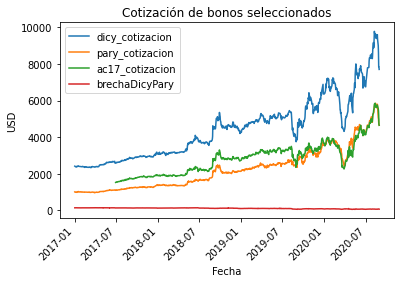

In [ ]:
df_filtrado.plot(title = "Cotización de bonos seleccionados", rot = 45, xlabel = "Fecha", ylabel = "USD")

Podemos hacer las visualizaciones también con matplotlib. Combinemos en una misma impresión distintos tipos de gráficos, por ejemplo, uno de lineas, puntos o [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) y de [barras](). Para modificar los colores también tenemos que revisar la [documentación](https://matplotlib.org/stable/gallery/color/named_colors.html). Existen varias formas de especificar los [colores](https://matplotlib.org/stable/tutorials/colors/colors.html); a continuación lo indicaremos por medio de strings. 

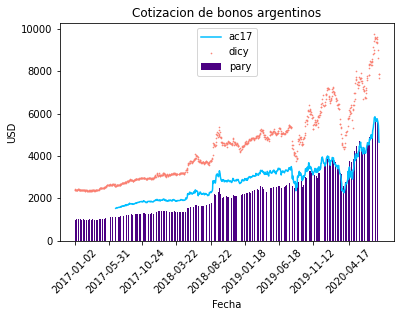

In [ ]:
import matplotlib.pyplot as plt

# df_filtrado.set_index("indice_tiempo", inplace=True)
plt.scatter(df_filtrado.index, df_filtrado.dicy_cotizacion, label= "dicy", s = 0.4, c = "salmon")
plt.bar(df_filtrado.index, df_filtrado.pary_cotizacion , label= "pary", color = "indigo")
plt.plot(df_filtrado.index, df_filtrado.ac17_cotizacion , label= "ac17", color = "deepskyblue")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.title("Cotizacion de bonos argentinos")
plt.legend(loc = "best")
plt.xticks(df_filtrado.index[::100],  rotation=45)
plt.show()

En cierto punto, el hecho de tener traspuesto los datos facilita la manipulación en pos de la visualización de los datos.

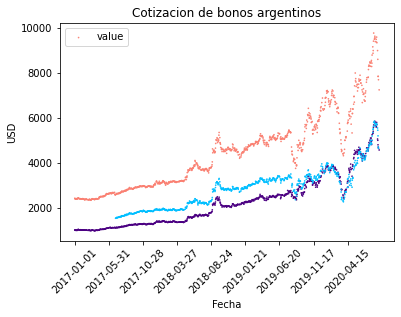

In [ ]:
fig, ax = plt.subplots() #para graficar varios suplots, no utilizado esta vez

df_melteado = df_filtrado.reset_index().melt(id_vars="indice_tiempo", var_name="bono")
data_plot = df_melteado[df_melteado["bono"] != "dif"]

colors = {'dicy_cotizacion': "salmon", 'pary_cotizacion': "indigo", 'ac17_cotizacion': "deepskyblue"}

ax.scatter(x = "indice_tiempo", y= "value",  c =  data_plot["bono"].map(colors), data = data_plot, s = 0.4)
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.title("Cotizacion de bonos argentinos")
plt.legend(loc = "best")
plt.xticks(df_filtrado.index[::150],  rotation=45)
plt.show()